## **Kenya Counties 2019 Population Density Analysis**
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Iamnyatichi/Kenya_population_analysis/blob/main/Kenya_population_density_map.ipynb)

### **Data Sources**
1. [City Population](https://www.citypopulation.de/en/kenya/admin/) - Kenya 2019 population census data.
2. [Diva GIS](https://diva-gis.org/data.html) - Kenya administrative boundaries data and Kenya water bodies.

### **Python Libraries**
- Pandas
- Geopandas
- Matplotlib

## **Executive Summary**
### **Introduction**
According to [The Kenya National Bureau of Statistics](https://www.knbs.or.ke/), Kenya's population is projected to be 52,428,290 as of mid-2024. This exercise analyses the 2019 population data of Kenya utilizing python's powerful libraries; pandas, geopandas, and matplotlib. The results entail the number of people per square kilometre in each of the 47 counties.

### **Analysis**
First, population data from [City Population](https://www.citypopulation.de/en/kenya/admin/), and administrative boundaries and water bodies data from [Diva GIS](https://diva-gis.org/data.html) was imported and cleaned. The two datasets, one a DataFrame and the other a GeoDataFrame respectively was merged based on the common attribute. The two GeoDataFrames(administrative data and water bodies shapefiles) were spatially joined and visualized in one map. The population density in the respective counties was calculated from the 2019 population data verses the land area and results visualized in a Choropleth map and a Bar Graph showing counties with highest population density to the lowest.

### **Results**
Nairobi county, also Kenya's capital city registered the highest population of 6,234 people per square kilometre, topping other counties. The top five counties with highest population density are:
1. Nairobi County- 6, 234 People/sq.Km
2. Mombasa County - 5,339 People/sq.Km
3. Vihiga County - 1,050 People/sq.Km
4. Kisii County - 966 People/sq.Km
5. Kiambu County - 939 People/sq.Km
   
The countries with the least population density in the country include;
1. Marsabit County - 6 People/sq.Km 
2. Tana River County -8 People/sq.Km
3. Isiolo County - 11 People/sq.Km
4. Turkana County - 13 People/sq.Km
5. Wajir County - 14 People/sq.Km
   
### **Conclusion**
The results portray interesting trends in the population distribution verses land area. Small counties in terms of land area like Kisii and Vihiga shows high population compared to large counties like Marsabit, Wajir, Turkana, and Isiolo among others. This is highly contributed by the weather and climate conditions of the various regions as well as economy, security, and food security. This analysis can be utilized by the government during national resources allocation/development plans and other development organizations like World Food Organization, and NGOs.

In [1]:
# Import python libraries

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import openpyxl
import lxml  # converting html table to excel

In [2]:
# Import and read data from citypopulation.de website
data = pd.read_html("https://www.citypopulation.de/en/kenya/admin/")
print(f"The data has {len(data)} tables successfully loaded")

The data has 6 tables successfully loaded


In [3]:
# convert to excel the first/needed table
data = data[0].to_excel(r"kenya_population.xlsx")

In [4]:
# Import the excel file and read the first five entries
kenya_population = pd.read_excel(r"kenya_population.xlsx")
kenya_population.head()

Unnamed: 0       Name           Status Population Census 1979-08-24  \
0           0    Central  Former Province                      2345833   
1           1     Kiambu           County                       686290   
2           2  Kirinyaga           County                       291431   
3           3   Murang'a           County                       648333   
4           4  Nyandarua           County                       233302   

  Population Census 1989-08-24 Population Census 1999-08-24  \
0                      3116703                      3724159   
1                       914412                      1389723   
2                       391516                       457105   
3                       858063                       736273   
4                       345420                       479902   

   Population Census 2009-08-24  Population Census 2019-08-24  \
0                       4383743                       5482239   
1                       1623282                       2417735   
2                        528054                        610411   
3                        942581                       1056640   
4                        596268                        638289   

   Population Projection 2023-07-01 Unnamed: 8  
0                           5949219          →  
1                           2652880          →  
2                            653112          →  
3                           1112288          →  
4                            695531          →

In [5]:
# Select the Name, Status, and 2019 population data
kenya_population = kenya_population[["Name", "Status", "Population Census 2019-08-24"]]
kenya_population.head()

Name           Status  Population Census 2019-08-24
0    Central  Former Province                       5482239
1     Kiambu           County                       2417735
2  Kirinyaga           County                        610411
3   Murang'a           County                       1056640
4  Nyandarua           County                        638289

In [6]:
# Access only counties data/ Filtering rows
kenya_population = kenya_population.loc[kenya_population["Status"] == "County"]
kenya_population.head()
# len(kenya_population)

Name  Status  Population Census 2019-08-24
1     Kiambu  County                       2417735
2  Kirinyaga  County                        610411
3   Murang'a  County                       1056640
4  Nyandarua  County                        638289
5      Nyeri  County                        759164

In [7]:
# change column name 'name' to 'county' and 'population'
kenya_population.rename(
    columns={"Name": "County", "Population Census 2019-08-24": "Population(2019)"},
    inplace=True,
)
kenya_population.head()

County  Status  Population(2019)
1     Kiambu  County           2417735
2  Kirinyaga  County            610411
3   Murang'a  County           1056640
4  Nyandarua  County            638289
5      Nyeri  County            759164

## Kenya counties data

In [8]:
# Importing kenya administrative boundaries
kenya_counties = gpd.read_file("kenyan-counties/County.shp")
kenya_counties.head()

OBJECTID   AREA  PERIMETER  COUNTY3_  COUNTY3_ID      COUNTY  Shape_Leng  \
0         1  5.677     15.047       2.0         1.0     Turkana   15.046838   
1         2  6.177     11.974       3.0         2.0    Marsabit   11.974165   
2         3  2.117      7.355       4.0         3.0     Mandera    7.355154   
3         4  4.610      9.838       5.0         4.0       Wajir    9.838408   
4         5  0.740      5.030       6.0         5.0  West Pokot    5.030271   

   Shape_Area                                           geometry  
0    5.676985  POLYGON ((35.79593 5.34449, 35.79659 5.34468, ...  
1    6.176831  POLYGON ((36.05061 4.45622, 36.23184 4.45124, ...  
2    2.117196  POLYGON ((41.62133 3.97673, 41.62272 3.9786, 4...  
3    4.609589  POLYGON ((39.31812 3.47197, 39.31956 3.47168, ...  
4    0.740481  POLYGON ((35.12745 2.62271, 35.12762 2.62302, ...

In [9]:
# extract counties and geomentry
kenya_counties = kenya_counties[["COUNTY", "geometry"]]
kenya_counties.head()

COUNTY                                           geometry
0     Turkana  POLYGON ((35.79593 5.34449, 35.79659 5.34468, ...
1    Marsabit  POLYGON ((36.05061 4.45622, 36.23184 4.45124, ...
2     Mandera  POLYGON ((41.62133 3.97673, 41.62272 3.9786, 4...
3       Wajir  POLYGON ((39.31812 3.47197, 39.31956 3.47168, ...
4  West Pokot  POLYGON ((35.12745 2.62271, 35.12762 2.62302, ...

In [10]:
# remane county column name to match the population data
kenya_counties = kenya_counties.rename(columns={"COUNTY": "County"})
kenya_counties.head()

County                                           geometry
0     Turkana  POLYGON ((35.79593 5.34449, 35.79659 5.34468, ...
1    Marsabit  POLYGON ((36.05061 4.45622, 36.23184 4.45124, ...
2     Mandera  POLYGON ((41.62133 3.97673, 41.62272 3.9786, 4...
3       Wajir  POLYGON ((39.31812 3.47197, 39.31956 3.47168, ...
4  West Pokot  POLYGON ((35.12745 2.62271, 35.12762 2.62302, ...

<Axes: >

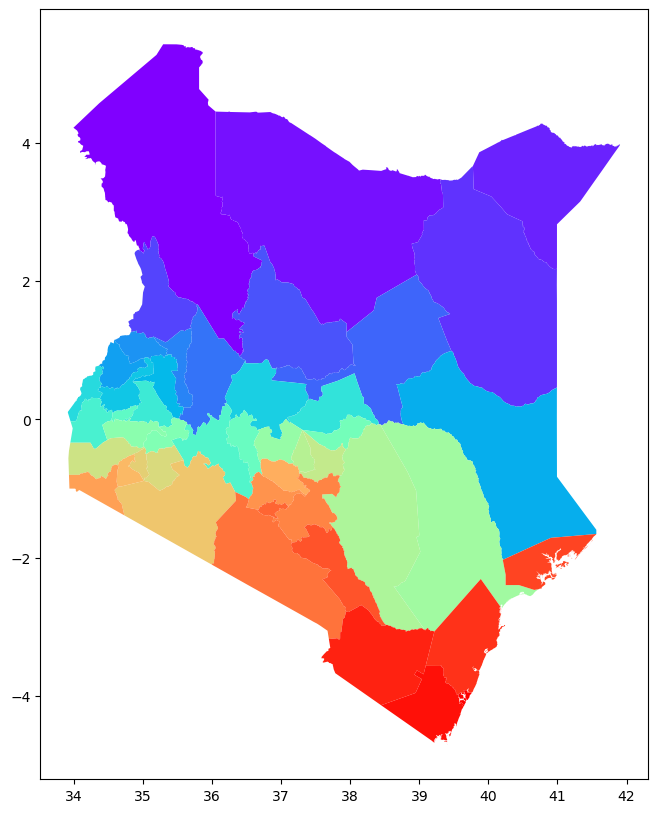

In [11]:
# Plot the data to visualize
kenya_counties.plot(cmap="rainbow", figsize=(10, 10))

## **Kenya Water bodies data**

In [12]:
# Adding waters and road datan_analysis\KEN_wat\KEN_water_areas_dcw.shp')
kenya_water = gpd.read_file("KEN_wat/KEN_water_areas_dcw.shp")
kenya_water.head()

# extract name and geometry
kenya_water = kenya_water[["NAME", "geometry"]]
kenya_water.head()

# Drop rows where NAME is 'None' and UNK
kenya_water = kenya_water[kenya_water["NAME"].notnull()]
kenya_water = kenya_water[kenya_water["NAME"] != "UNK"]

kenya_water.head()

NAME                                           geometry
0   LAKE ELMENTEITA  POLYGON ((36.24399 -0.41234, 36.24495 -0.42405...
3    LAKE MUKUNGUYA  POLYGON ((40.68655 -2.41269, 40.68384 -2.41663...
6     LAKE STEFANIE  POLYGON ((36.72438 4.44166, 36.72501 4.44166, ...
7       LAKE RUDOLF  POLYGON ((36.21353 4.45833, 36.21532 4.44868, ...
10          TURKWEL  POLYGON ((36.09623 3.11295, 36.09168 3.09988, ...

<Axes: >

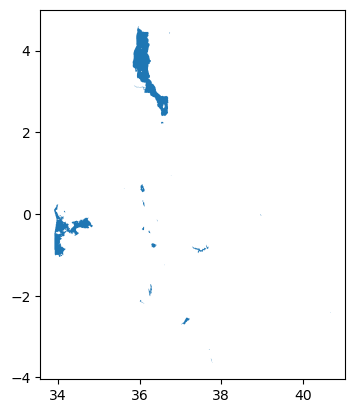

In [13]:
kenya_water.plot()

In [14]:
print(kenya_water.crs)
print(kenya_counties.crs)

EPSG:4326
EPSG:4326


In [15]:
# Reproject the  counties and water data to a projected crs
kenya_counties = kenya_counties.to_crs(epsg=21037)
kenya_water = kenya_water.to_crs(epsg=21037)
print(kenya_water.crs)
print(kenya_counties.crs)

EPSG:21037
EPSG:21037


In [16]:
# joining the two dataframes
kenya_counties = gpd.sjoin(kenya_counties, kenya_water, how="left", predicate="within")

In [17]:
# drop the Nan columns
kenya_counties = kenya_counties.drop(columns=["index_right", "NAME"])
kenya_counties.head()

County                                           geometry
0     Turkana  POLYGON ((144729.755 10591968.72, 144803.942 1...
1    Marsabit  POLYGON ((172553.021 10493508.507, 192681.843 ...
2     Mandera  POLYGON ((790992.936 10440315.496, 791147.43 1...
3       Wajir  POLYGON ((535236.527 10384065.281, 535396.7 10...
4  West Pokot  POLYGON ((69105.501 10290856.224, 69124.731 10...

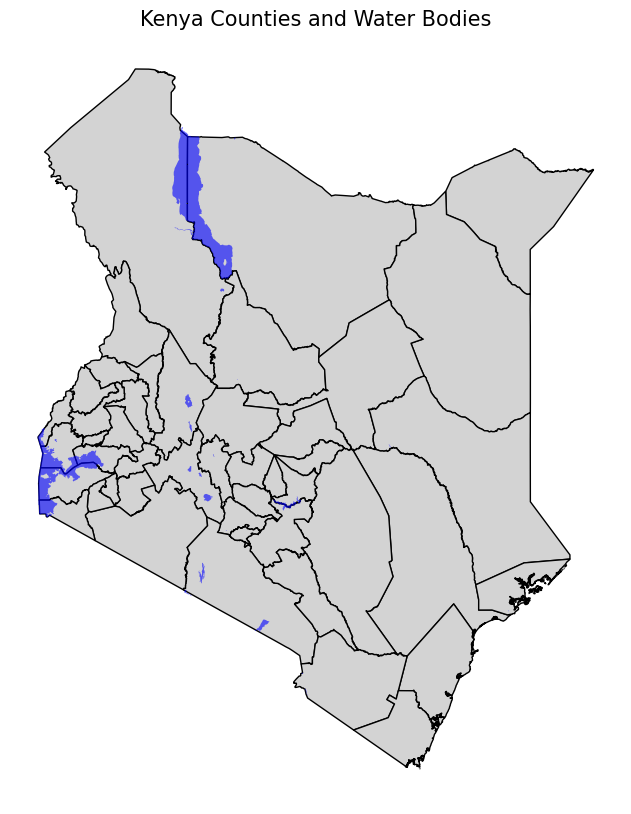

In [18]:
# Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot counties
kenya_counties.plot(ax=ax, color="lightgray", edgecolor="black")

# Plot water bodies on top
kenya_water.plot(ax=ax, color="blue", alpha=0.6)

# Customize the map
ax.set_title("Kenya Counties and Water Bodies", fontsize=15)
ax.axis("off")  # Optional: turn off the axis

plt.show()

In [19]:
# checking the number of entries
len(kenya_counties)

47

## **Kenya Counties and Population data check**

In [20]:
# Check completion of data in both datasets
missing_counties = set(kenya_counties["County"]) - set(kenya_population["County"])
for county in missing_counties:
    print(f"The county, {county} is not in the kenya population data")

The county, Tharaka is not in the kenya population data
The county, Keiyo-Marakwet is not in the kenya population data
The county, Taita Taveta is not in the kenya population data


In [21]:
# Replace the missing data due to incorrect names
replace_names = {
    "Taita Taveta": "Taita-Taveta",
    "Tharaka": "Tharaka-Nithi",
    "Keiyo-Marakwet": "Elgeyo-Marakwet",
}
kenya_counties["County"] = kenya_counties["County"].replace(replace_names)

In [22]:
# Re-check for missing counties
missing_counties = set(kenya_counties["County"]) - set(kenya_population["County"])

if missing_counties:
    for county in missing_counties:
        print(f"The county, {county} is still missing in the population data.")
else:
    print("✅ All county names are now matched with the population data.")

✅ All county names are now matched with the population data.


## **Population Density Analysis**

In [23]:
# Create new column for area calculation
kenya_counties["Area(Km2)"] = kenya_counties.geometry.area / 1000000
# Round off the area
kenya_counties["Area(Km2)"] = kenya_counties["Area(Km2)"].round(4)
kenya_counties.head()

County                                           geometry   Area(Km2)
0     Turkana  POLYGON ((144729.755 10591968.72, 144803.942 1...  69970.2778
1    Marsabit  POLYGON ((172553.021 10493508.507, 192681.843 ...  75925.8597
2     Mandera  POLYGON ((790992.936 10440315.496, 791147.43 1...  26018.6614
3       Wajir  POLYGON ((535236.527 10384065.281, 535396.7 10...  56684.0897
4  West Pokot  POLYGON ((69105.501 10290856.224, 69124.731 10...   9142.6717

In [24]:
# Merge the kenya counties to the population data on County attribute
kenya_counties = kenya_counties.merge(kenya_population, on="County")
kenya_counties.head()

County                                           geometry   Area(Km2)  \
0     Turkana  POLYGON ((144729.755 10591968.72, 144803.942 1...  69970.2778   
1    Marsabit  POLYGON ((172553.021 10493508.507, 192681.843 ...  75925.8597   
2     Mandera  POLYGON ((790992.936 10440315.496, 791147.43 1...  26018.6614   
3       Wajir  POLYGON ((535236.527 10384065.281, 535396.7 10...  56684.0897   
4  West Pokot  POLYGON ((69105.501 10290856.224, 69124.731 10...   9142.6717   

   Status  Population(2019)  
0  County            926976  
1  County            459785  
2  County            867457  
3  County            781263  
4  County            621241

<Axes: >

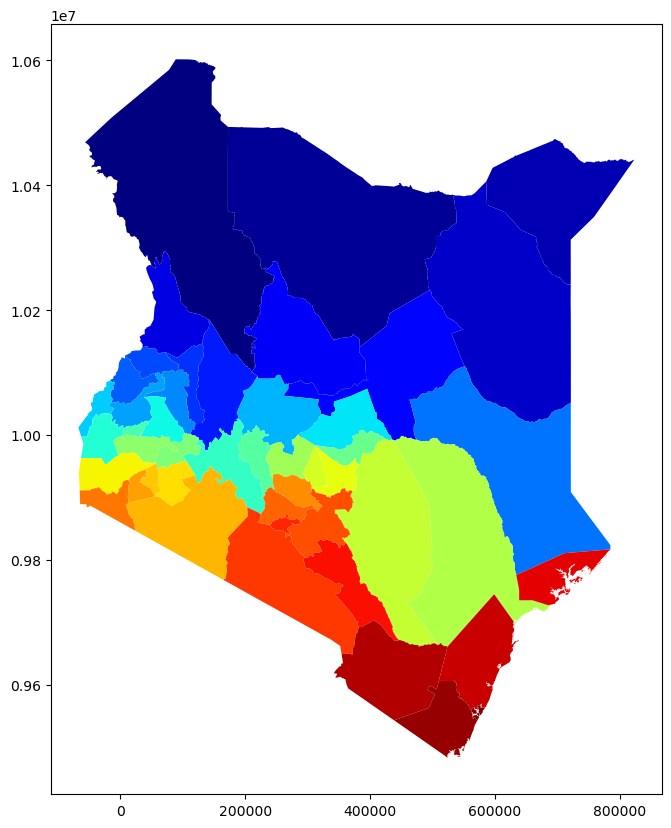

In [25]:
# Plot to confirm  a successful merge and full data
kenya_counties.plot(cmap="jet", figsize=(10, 10))

## **Population Density Analysis**

In [26]:
# Calculating population density
kenya_counties["Pop_density(People/sq.Km)"] = (
    kenya_counties["Population(2019)"] / kenya_counties["Area(Km2)"]
)


# Round off to remove decimals on the population density
kenya_counties["Pop_density(People/sq.Km)"] = (
    kenya_counties["Pop_density(People/sq.Km)"].round(0).astype(int)
)
kenya_counties.head()

County                                           geometry   Area(Km2)  \
0     Turkana  POLYGON ((144729.755 10591968.72, 144803.942 1...  69970.2778   
1    Marsabit  POLYGON ((172553.021 10493508.507, 192681.843 ...  75925.8597   
2     Mandera  POLYGON ((790992.936 10440315.496, 791147.43 1...  26018.6614   
3       Wajir  POLYGON ((535236.527 10384065.281, 535396.7 10...  56684.0897   
4  West Pokot  POLYGON ((69105.501 10290856.224, 69124.731 10...   9142.6717   

   Status  Population(2019)  Pop_density(People/sq.Km)  
0  County            926976                         13  
1  County            459785                          6  
2  County            867457                         33  
3  County            781263                         14  
4  County            621241                         68

### **Top 10 counties with highest population density**

In [27]:
# Top 10 counties with highest population
top_counties = kenya_counties.sort_values(
    by="Pop_density(People/sq.Km)", ascending=False
)
top_counties = top_counties[["County", "Area(Km2)", "Pop_density(People/sq.Km)"]]
top_counties.head(10)

County  Area(Km2)  Pop_density(People/sq.Km)
40   Nairobi   705.2876                       6234
46   Mombasa   226.3312                       5339
20    Vihiga   561.8740                       1050
34     Kisii  1311.2970                        966
37    Kiambu  2575.4265                        939
32   Nyamira   888.4599                        682
13  Kakamega  3003.3891                        622
10   Bungoma  3039.8638                        550
15     Busia  1827.1631                        489
24    Kisumu  2686.7985                        430

### **10 Counties with lowest population density Vs Land Area**

In [28]:
# Least 10 counties with the Lowest population with their land area
least_pop_counties = kenya_counties.sort_values(
    by="Pop_density(People/sq.Km)", ascending=True
)
least_pop_counties = least_pop_counties[
    ["County", "Area(Km2)", "Pop_density(People/sq.Km)"]
]
least_pop_counties.head(10)

County   Area(Km2)  Pop_density(People/sq.Km)
1       Marsabit  75925.8597                          6
26    Tana River  37797.0790                          8
6         Isiolo  25333.2137                         11
0        Turkana  69970.2778                         13
3          Wajir  56684.0897                         14
5        Samburu  21086.7787                         15
11       Garissa  44810.4247                         19
44  Taita-Taveta  17141.0699                         20
42          Lamu   6172.0305                         23
2        Mandera  26018.6614                         33

## **Results Visualization; Map and Bar Graph**

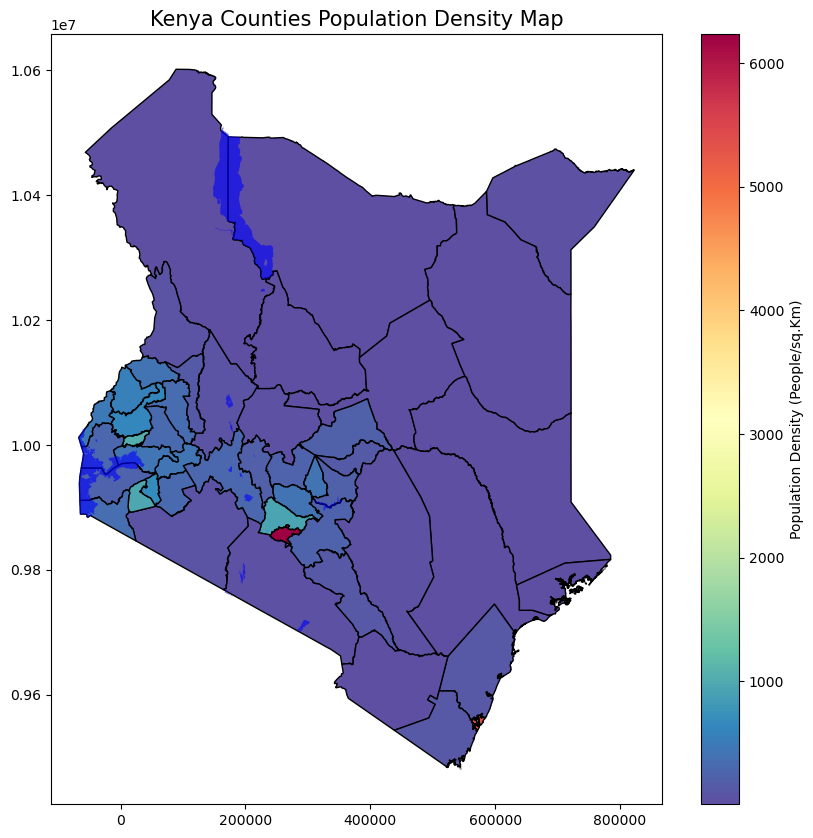

In [29]:
# Visualizing the Population Density Results

fig, ax = plt.subplots(figsize=(10, 10))

kenya_counties.plot(
    column="Pop_density(People/sq.Km)",
    cmap="Spectral_r",
    legend=True,
    legend_kwds={"label": "Population Density (People/sq.Km)"},
    ax=ax,  # Attach plot to the axis
    edgecolor="black",
)
# Plot water bodies on top
kenya_water.plot(ax=ax, color="blue", alpha=0.6)

ax.set_title("Kenya Counties Population Density Map", fontsize=15)

# Save the figure after plotting
plt.savefig("kenya_pop_map.jpeg", format="jpeg", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
kenya_counties=kenya_counties.explore(
    column="Pop_density(People/sq.Km)",
    cmap='Spectral_r',
    # tiles='CartoDB positron',
    edgecolor="black",
)
# kenya_counties.save('kenya_web_map.html')

#visualize the interactive map
kenya_counties



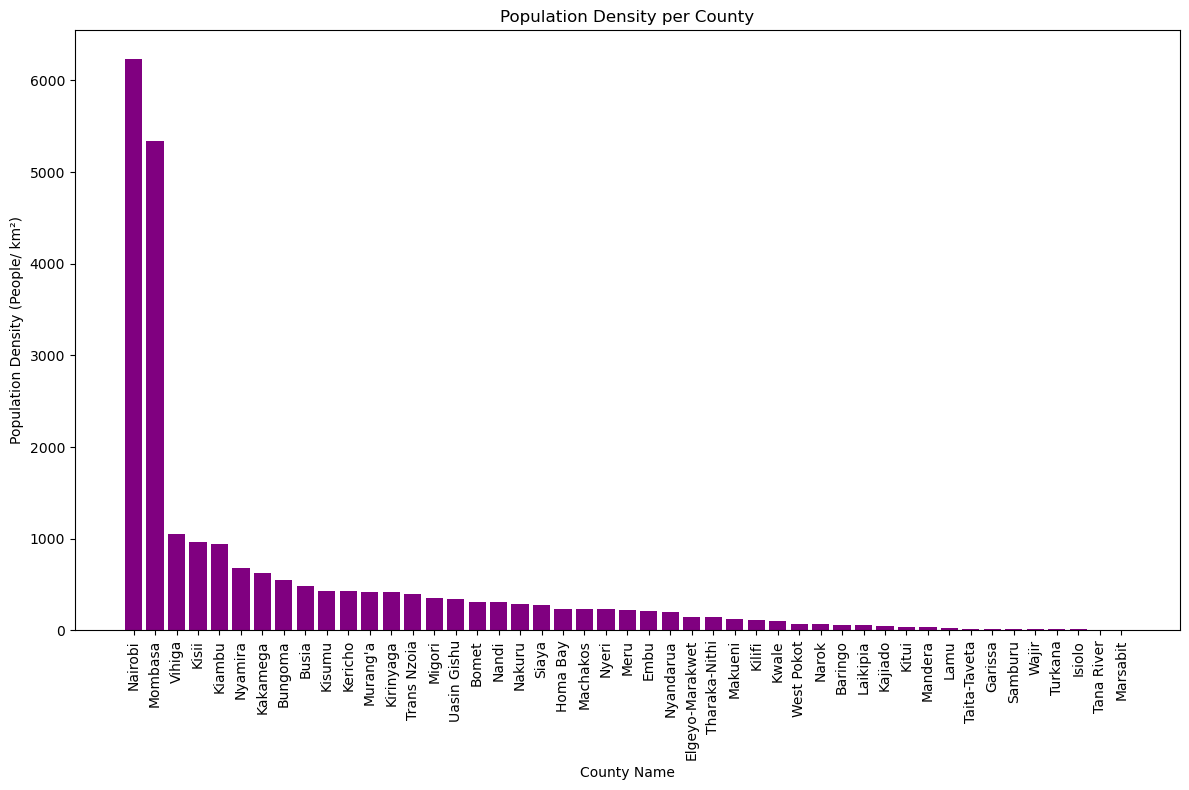

In [31]:
# Visualizing in Bar Graph
plt.figure(figsize=(12, 8))
plt.bar(
    top_counties["County"], top_counties["Pop_density(People/sq.Km)"], color="purple"
)
plt.title("Population Density per County")
plt.xlabel("County Name")
plt.ylabel("Population Density (People/ km²)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **The END**